# __1 - Análise Exploratória I: Estátiscas, Zeros e Outiliers__ 

In [14]:
# Icluindo diretório dos módulos no paht
import sys

path_modulos = sys.path[0].rstrip("notebooks") + "modulos"
sys.path.append(path_modulos)

# Bibliotecas para análise de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Bibliotecas para modelagem e acesso aos dados
from subestacoes import Subestacao, Info ,string_conexao, PontoDeMedicao

plt.style.use('seaborn')
rcParams['figure.figsize'] = [12, 8]

### __1. Carregando Dados do Banco de Dados__

In [2]:
# String de Conexão
con = string_conexao()
# Tablea de Informações
info = Info(con)
tabela_info = info.get_tabela_info()
tabela_info

{'ABR': {'nome': 'Alto Branco',
  'latitude': -7.204444,
  'longitude': -35.872778},
 'AER': {'nome': 'Aeroclube', 'latitude': -7.263583, 'longitude': -35.892361},
 'ARA': {'nome': 'Areia', 'latitude': -6.972972, 'longitude': -35.705833},
 'ARN': {'nome': 'Araruna', 'latitude': -6.534722, 'longitude': -35.733194},
 'ARR': {'nome': 'Aroeiras', 'latitude': -7.55675, 'longitude': -35.727166},
 'BJC': {'nome': 'Brejo do Cruz',
  'latitude': -6.344611,
  'longitude': -37.499972},
 'BNR': {'nome': 'Bananeiras', 'latitude': -6.76, 'longitude': -35.644444},
 'BQR': {'nome': 'Boqueirão', 'latitude': -7.485486, 'longitude': -36.136219},
 'BSA': {'nome': 'Bessa', 'latitude': -7.087083, 'longitude': -34.850416},
 'BVA': {'nome': 'Boa Vista', 'latitude': -7.288916, 'longitude': -36.241805},
 'CAA': {'nome': 'Caaporã', 'latitude': -7.514547, 'longitude': -34.888266},
 'CBD': {'nome': 'Cabedelo', 'latitude': -7.027361, 'longitude': -34.840166},
 'CDE': {'nome': 'Conde', 'latitude': -7.262527, 'longit

A tabela __Info__ possui as seguintes informações:
- A sigla é achave principal - string de três letras
- Nome da subestação (nome)- string
- Latitude - float 
- Longitude - float


#### __Classe Subestação__

- Abstração que representa as subestações
- Para acessar dados de uma subestação, é necessário passar no construtor da classe a sigla e um conector para o banco de dados

In [3]:
jps = Subestacao('JPS', tabela_info['JPS'].get("nome"), con)

In [4]:
# Dados no formato de dataframe
jps_df = jps.get_tabela(con)     

In [5]:
jps_df.head()

,data,JPS_TIPO_12B1_WATT,JPS_TIPO_12B2_WATT,JPS_TIPO_11B1_WATT,JPS_TIPO_11B2_WATT,JPS_TIPO_21L1_WATT,JPS_TIPO_21L2_WATT,JPS_TIPO_21L3_WATT,JPS_TIPO_21L4_WATT,JPS_TIPO_21L5_WATT,JPS_TIPO_21L6_WATT,JPS_TIPO_21L7_WATT,JPS_TIPO_21L8_WATT,JPS_TIPO_21L9_WATT
0,2008-01-01 00:00:00,7.9,10.2,7.8,10.2,1.961,0.561,0.988,1.220,0.877,3.361,2.294,1.737,3.618
1,2008-01-01 00:15:00,7.7,10.1,7.7,10.0,1.938,0.556,0.968,1.167,0.840,3.339,2.227,1.798,3.469
2,2008-01-01 00:30:00,7.7,9.8,7.7,10.0,1.933,0.567,0.894,1.174,0.843,3.291,2.115,1.653,3.546
3,2008-01-01 00:45:00,7.4,9.8,7.4,10.0,1.892,0.567,0.894,1.176,0.815,3.211,2.066,1.630,3.376
4,2008-01-01 01:00:00,0.0,0.0,0.0,0.0,1.860,0.000,0.864,1.146,0.812,3.268,2.027,1.667,3.483


In [6]:
jps_df.set_index("data", inplace = True)

In [7]:
# Indoformações
jps_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210432 entries, 2008-01-01 00:00:00 to 2013-12-31 23:45:00
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   JPS_TIPO_12B1_WATT  210432 non-null  float64
 1   JPS_TIPO_12B2_WATT  210432 non-null  float64
 2   JPS_TIPO_11B1_WATT  210432 non-null  float64
 3   JPS_TIPO_11B2_WATT  210432 non-null  float64
 4   JPS_TIPO_21L1_WATT  210432 non-null  float64
 5   JPS_TIPO_21L2_WATT  210432 non-null  float64
 6   JPS_TIPO_21L3_WATT  210432 non-null  float64
 7   JPS_TIPO_21L4_WATT  210432 non-null  float64
 8   JPS_TIPO_21L5_WATT  210432 non-null  float64
 9   JPS_TIPO_21L6_WATT  210432 non-null  float64
 10  JPS_TIPO_21L7_WATT  210432 non-null  float64
 11  JPS_TIPO_21L8_WATT  210432 non-null  float64
 12  JPS_TIPO_21L9_WATT  210432 non-null  float64
dtypes: float64(13)
memory usage: 22.5 MB


Não há valores nulos no dataframe.

In [8]:
# Valores negativos por coluna
jps_df.apply(lambda x:x<0).sum()

JPS_TIPO_12B1_WATT    0
JPS_TIPO_12B2_WATT    0
JPS_TIPO_11B1_WATT    0
JPS_TIPO_11B2_WATT    0
JPS_TIPO_21L1_WATT    0
JPS_TIPO_21L2_WATT    0
JPS_TIPO_21L3_WATT    0
JPS_TIPO_21L4_WATT    0
JPS_TIPO_21L5_WATT    0
JPS_TIPO_21L6_WATT    0
JPS_TIPO_21L7_WATT    0
JPS_TIPO_21L8_WATT    0
JPS_TIPO_21L9_WATT    0
dtype: int64

Não há valores negativos no dataframe

In [9]:
# Resumo Estatítico
jps_df.describe().T

,count,mean,std,min,25%,50%,75%,max
JPS_TIPO_12B1_WATT,210432.0,11.009750,4.541501,0.0,7.800,10.3000,13.900,25.700
JPS_TIPO_12B2_WATT,210432.0,12.477408,4.525460,0.0,9.400,11.6000,15.700,25.100
JPS_TIPO_11B1_WATT,210432.0,10.940438,4.459939,0.0,7.800,10.2000,13.800,25.300
JPS_TIPO_11B2_WATT,210432.0,12.357640,4.515099,0.0,9.300,11.5000,15.600,24.300
JPS_TIPO_21L1_WATT,210432.0,3.178490,1.283692,0.0,2.300,2.8530,4.009,8.834
JPS_TIPO_21L2_WATT,210432.0,1.287988,0.916906,0.0,0.652,0.8110,2.021,5.414
JPS_TIPO_21L3_WATT,210432.0,2.001819,1.364070,0.0,1.036,1.3110,3.125,7.882
JPS_TIPO_21L4_WATT,210432.0,3.055634,1.562503,0.0,1.948,2.7685,3.879,10.125
JPS_TIPO_21L5_WATT,210432.0,1.637933,1.048643,0.0,0.896,1.1450,2.419,7.055
JPS_TIPO_21L6_WATT,210432.0,3.117689,1.344234,0.0,2.118,2.8050,4.058,7.467


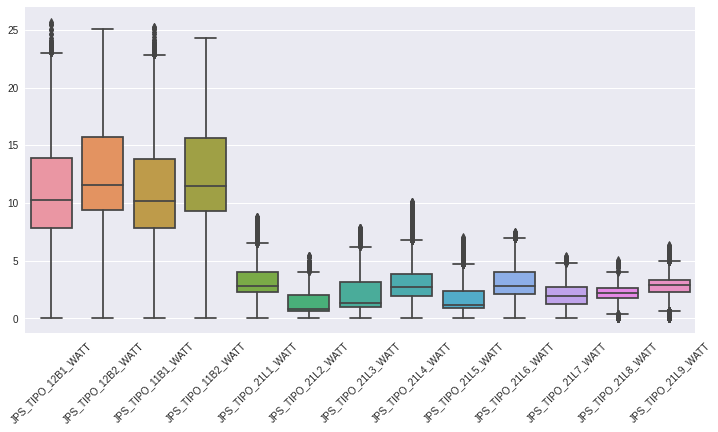

In [19]:
# Boxplot
plt.figure(figsize=(12,6))

ax = sns.boxplot(data = jps_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

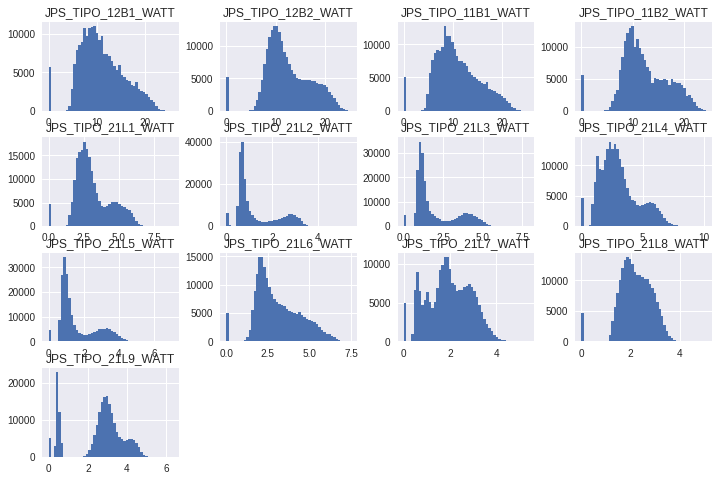

In [44]:
jps_df.hist(bins=50)
plt.show()

In [45]:
# Substituindo zeros por valores nulos

jps_nulos = jps_df.replace(0, np.nan)

In [46]:
jps_nulos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210432 entries, 2008-01-01 00:00:00 to 2013-12-31 23:45:00
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   JPS_TIPO_12B1_WATT  204713 non-null  float64
 1   JPS_TIPO_12B2_WATT  205259 non-null  float64
 2   JPS_TIPO_11B1_WATT  205291 non-null  float64
 3   JPS_TIPO_11B2_WATT  204841 non-null  float64
 4   JPS_TIPO_21L1_WATT  205828 non-null  float64
 5   JPS_TIPO_21L2_WATT  204604 non-null  float64
 6   JPS_TIPO_21L3_WATT  205766 non-null  float64
 7   JPS_TIPO_21L4_WATT  205783 non-null  float64
 8   JPS_TIPO_21L5_WATT  205765 non-null  float64
 9   JPS_TIPO_21L6_WATT  205749 non-null  float64
 10  JPS_TIPO_21L7_WATT  205585 non-null  float64
 11  JPS_TIPO_21L8_WATT  205769 non-null  float64
 12  JPS_TIPO_21L9_WATT  205554 non-null  float64
dtypes: float64(13)
memory usage: 22.5 MB


In [47]:
# Procentagem de valores nulos por coluna

jps_nulos.isnull().sum()/jps_nulos.count()

JPS_TIPO_12B1_WATT    0.027937
JPS_TIPO_12B2_WATT    0.025202
JPS_TIPO_11B1_WATT    0.025043
JPS_TIPO_11B2_WATT    0.027294
JPS_TIPO_21L1_WATT    0.022368
JPS_TIPO_21L2_WATT    0.028484
JPS_TIPO_21L3_WATT    0.022676
JPS_TIPO_21L4_WATT    0.022592
JPS_TIPO_21L5_WATT    0.022681
JPS_TIPO_21L6_WATT    0.022761
JPS_TIPO_21L7_WATT    0.023577
JPS_TIPO_21L8_WATT    0.022661
JPS_TIPO_21L9_WATT    0.023731
dtype: float64

In [48]:
jps_nulos.describe().T

,count,mean,std,min,25%,50%,75%,max
JPS_TIPO_12B1_WATT,204713.0,11.317326,4.209571,0.200,8.000,10.500,14.10000,25.700
JPS_TIPO_12B2_WATT,205259.0,12.791867,4.119877,0.500,9.600,11.700,15.80000,25.100
JPS_TIPO_11B1_WATT,205291.0,11.214414,4.161332,0.200,8.000,10.400,14.00000,25.300
JPS_TIPO_11B2_WATT,204841.0,12.694934,4.081740,0.800,9.500,11.600,15.80000,24.300
JPS_TIPO_21L1_WATT,205828.0,3.249587,1.205690,0.056,2.339,2.879,4.05800,8.834
JPS_TIPO_21L2_WATT,204604.0,1.324675,0.903363,0.014,0.663,0.826,2.07925,5.414
JPS_TIPO_21L3_WATT,205766.0,2.047213,1.345343,0.107,1.051,1.330,3.19700,7.882
JPS_TIPO_21L4_WATT,205783.0,3.124666,1.510254,0.438,2.011,2.803,3.92700,10.125
JPS_TIPO_21L5_WATT,205765.0,1.675083,1.030711,0.004,0.910,1.161,2.46600,7.055
JPS_TIPO_21L6_WATT,205749.0,3.188650,1.273508,0.016,2.153,2.850,4.09400,7.467


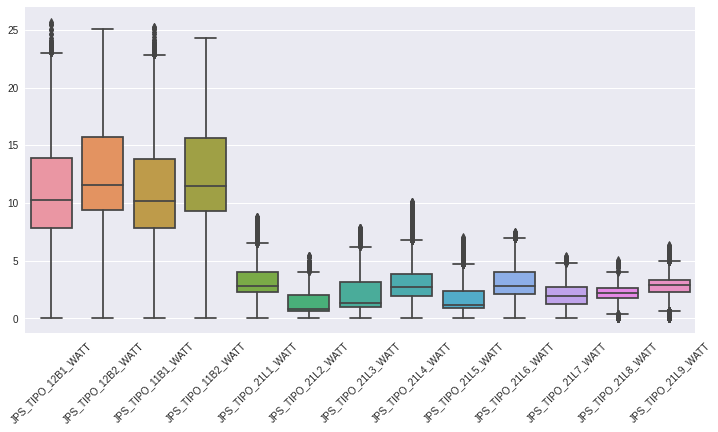

In [24]:
# Boxplot
plt.figure(figsize=(12,6))

ax = sns.boxplot(data = jps_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

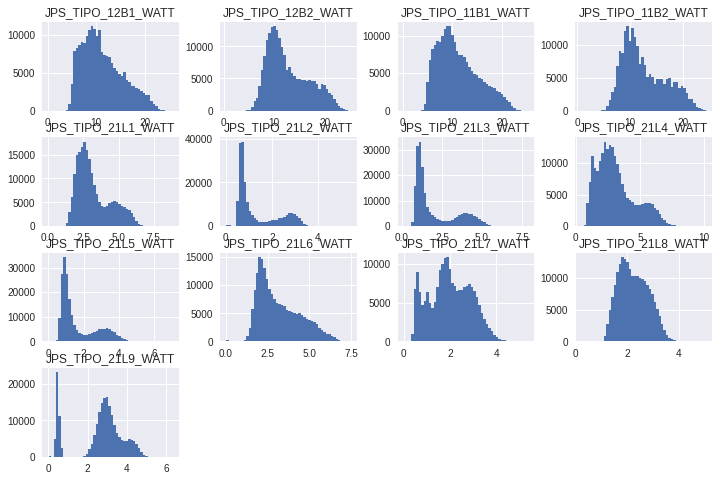

In [51]:
jps_nulos.hist(bins=50)
plt.show()

In [52]:
jps_nulos.groupby(by=jps_nulos.index.year).count()

,JPS_TIPO_12B1_WATT,JPS_TIPO_12B2_WATT,JPS_TIPO_11B1_WATT,JPS_TIPO_11B2_WATT,JPS_TIPO_21L1_WATT,JPS_TIPO_21L2_WATT,JPS_TIPO_21L3_WATT,JPS_TIPO_21L4_WATT,JPS_TIPO_21L5_WATT,JPS_TIPO_21L6_WATT,JPS_TIPO_21L7_WATT,JPS_TIPO_21L8_WATT,JPS_TIPO_21L9_WATT
data,,,,,,,,,,,,,
2008,34099,34607,34586,34594,34617,34137,34604,34630,34636,34576,34612,34627,34607
2009,33786,33826,33775,33345,33947,33896,33932,33929,33933,33907,33844,33927,33908
2010,34309,34295,34292,34266,34544,34435,34505,34530,34497,34532,34471,34546,34505
2011,34616,34624,34633,34631,34703,34670,34704,34695,34697,34704,34648,34692,34516
2012,33849,33838,33851,33856,33861,33850,33862,33854,33864,33861,33846,33842,33850
2013,34054,34069,34154,34149,34156,33616,34159,34145,34138,34169,34164,34135,34168


In [26]:
jps_nulos.groupby(by=jps_nulos.index.year).count().sum(axis=1)

data
2008    448932
2009    439955
2010    447727
2011    450533
2012    440084
2013    443276
dtype: int64

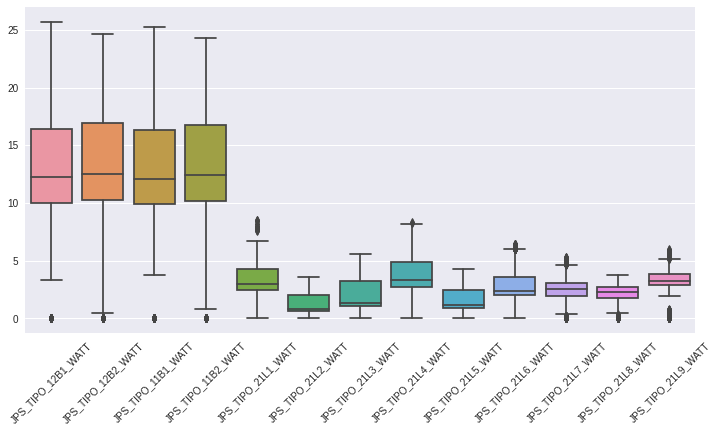

In [53]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = jps_df["2011"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [56]:
jps_teste = jps_df.loc[:,['JPS_TIPO_12B2_WATT','JPS_TIPO_21L9_WATT']]

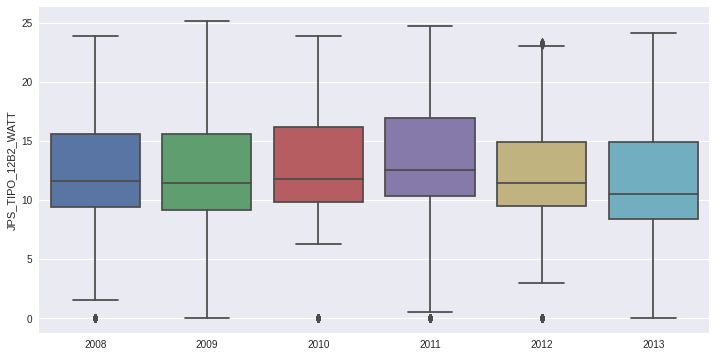

In [57]:
plt.figure(figsize=(12,6))

sns.boxplot(x=jps_teste.index.year.values, y='JPS_TIPO_12B2_WATT', data = jps_teste)
plt.show()

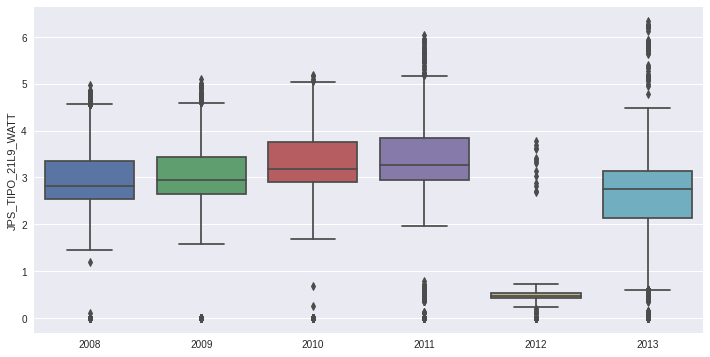

In [58]:
plt.figure(figsize=(12,6))

sns.boxplot(x=jps_teste.index.year.values, y='JPS_TIPO_21L9_WATT', data = jps_teste)
plt.show()

<AxesSubplot:ylabel='Count'>

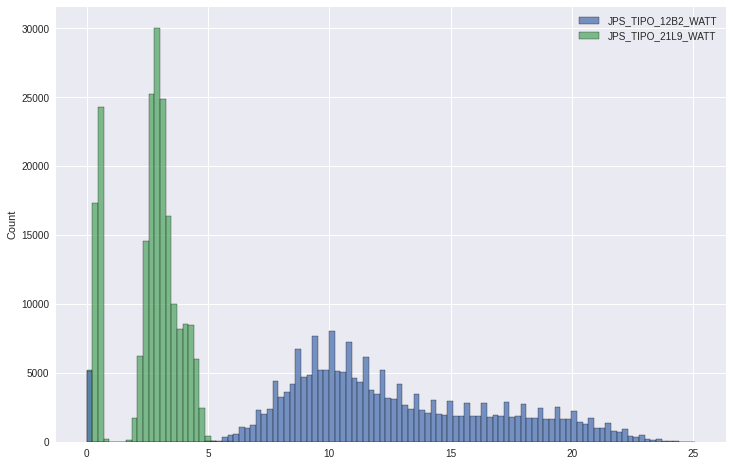

In [59]:
sns.histplot(jps_teste)

In [61]:
jps_teste_nulos = jps_nulos.loc[:,['JPS_TIPO_12B2_WATT','JPS_TIPO_21L9_WATT']]

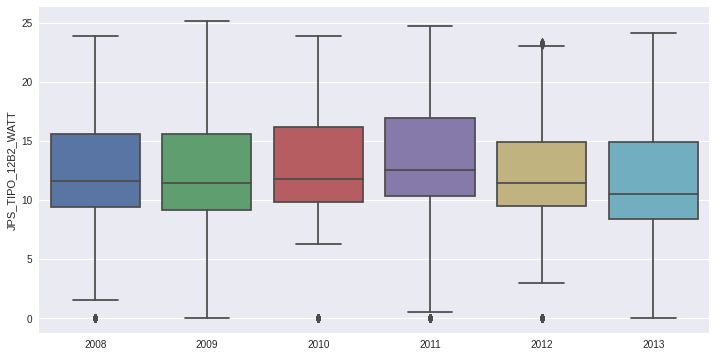

In [63]:
plt.figure(figsize=(12,6))

sns.boxplot(x=jps_teste_nulos.index.year.values, y='JPS_TIPO_12B2_WATT', data = jps_teste)
plt.show()

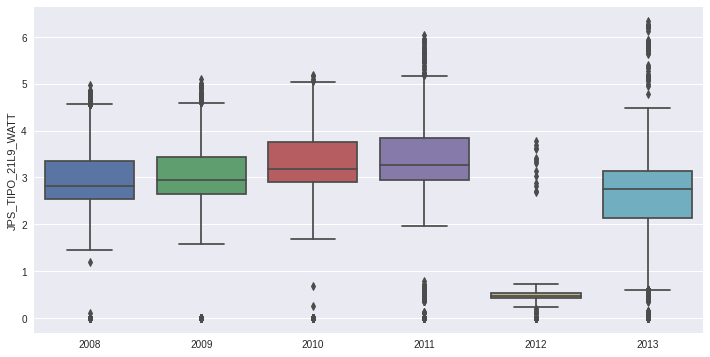

In [64]:
plt.figure(figsize=(12,6))

sns.boxplot(x=jps_teste_nulos.index.year.values, y='JPS_TIPO_21L9_WATT', data = jps_teste)
plt.show()

#### Análise 2011 

In [65]:
jps_year = jps_df['2011']

In [66]:
col1 = 'JPS_TIPO_12B2_WATT'
col2 = 'JPS_TIPO_21L9_WATT'

<AxesSubplot:ylabel='JPS_TIPO_12B2_WATT'>

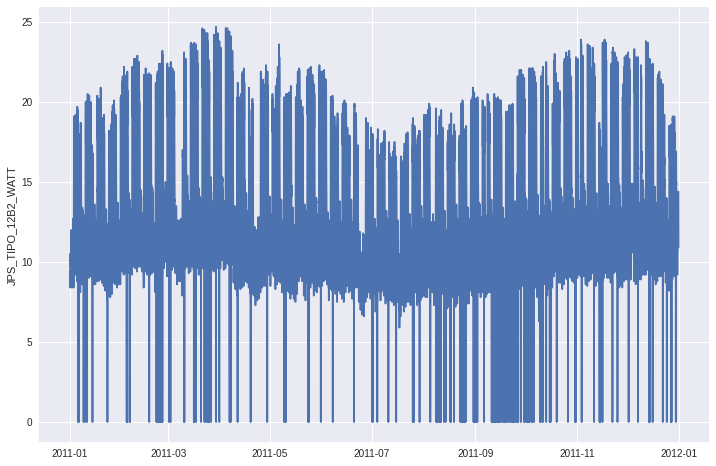

In [67]:
sns.lineplot(x=jps_year.index.values, y=col1, data=jps_year)
plt.show()

<AxesSubplot:ylabel='JPS_TIPO_21L9_WATT'>

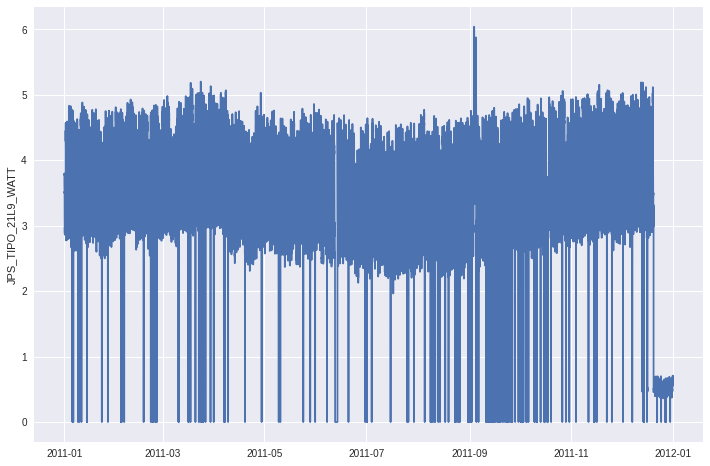

In [68]:
sns.lineplot(x=jps_year.index.values, y=col2, data=jps_year)
plt.show()

In [69]:
jps_year_nulos = jps_nulos['2011']

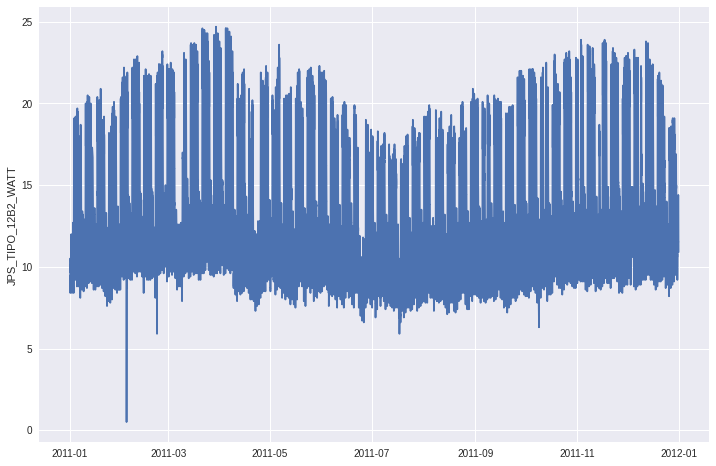

In [72]:
sns.lineplot(x=jps_year_nulos.index.values, y=col1, data=jps_year_nulos)
plt.show()

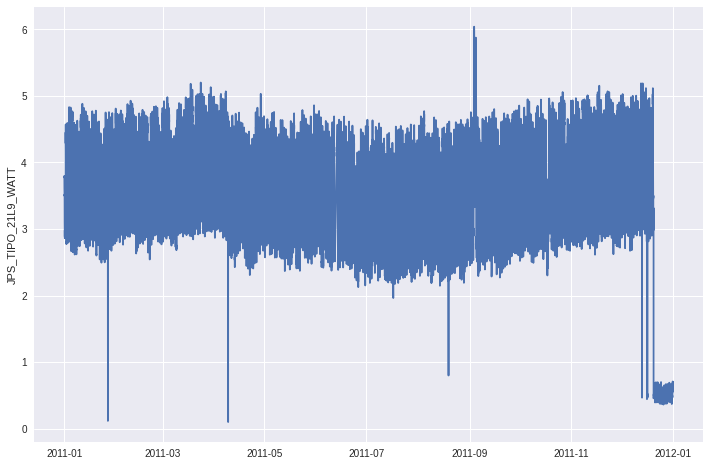

In [71]:
sns.lineplot(x=jps_year_nulos.index.values, y=col2, data=jps_year_nulos)
plt.show()

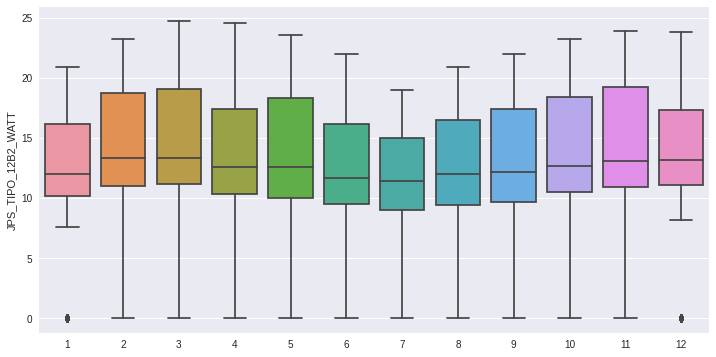

In [78]:
sns.boxplot(x=jps_year.index.month.values, y=col1, data = jps_year)
plt.show()

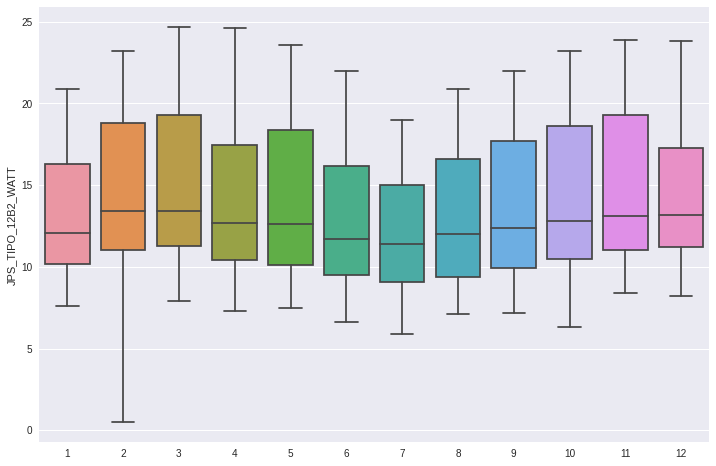

In [80]:
sns.boxplot(x=jps_year_nulos.index.month.values, y=col1, data = jps_year_nulos)
plt.show()

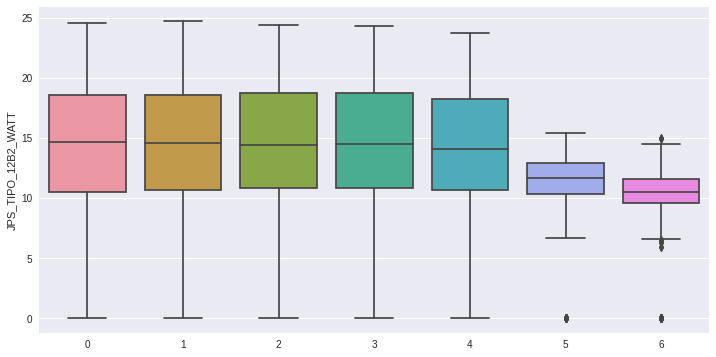

In [77]:
sns.boxplot(x=jps_year.index.weekday.values, y=col1, data = jps_year)
plt.show()

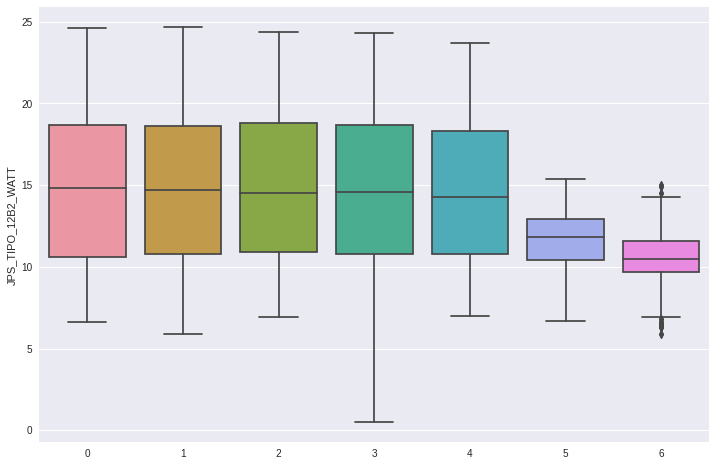

In [81]:
sns.boxplot(x=jps_year.index.weekday.values, y=col1, data = jps_year_nulos)
plt.show()

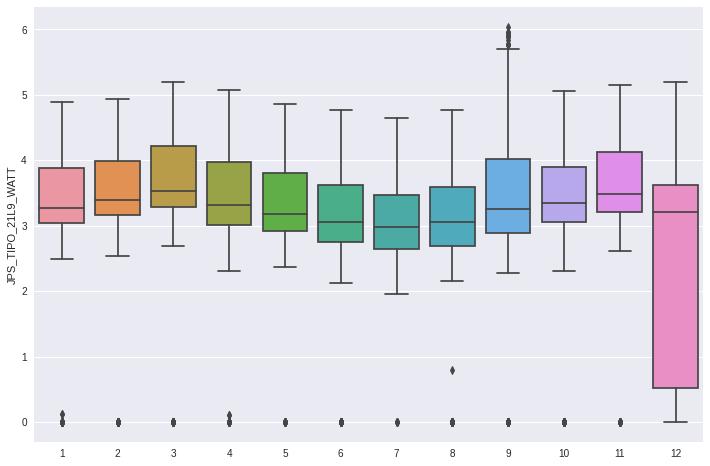

In [82]:
sns.boxplot(x=jps_year.index.month.values, y=col2, data = jps_year)
plt.show()

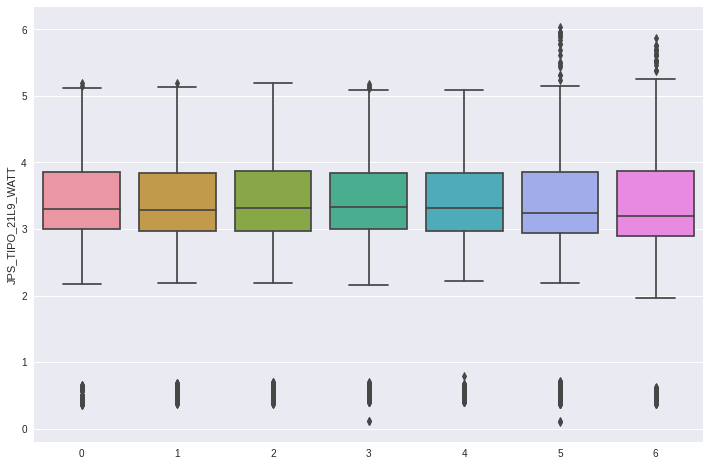

In [84]:
sns.boxplot(x=jps_year_nulos.index.weekday.values, y=col2, data = jps_year_nulos)
plt.show()

### __Outilers__

In [106]:
def outliers_limiar(dados):
    
    desvio = dados.std()
    media = dados.mean()
    limiar_max = media + 3*desvio
    limiar_min = media - 3*desvio
    
    outliers = dados.apply(lambda x: (x>limiar_max or x < limiar_min))
    return outliers
    

In [111]:
jps_year['outlier_limiar'] = outliers_limiar(jps_year[col1])
jps_year_nulos['outlier_limiar'] = outliers_limiar(jps_year_nulos[col1])

<ipython-input-111-d74131b93a29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jps_year['outlier_limiar'] = outliers_limiar(jps_year[col1])
<ipython-input-111-d74131b93a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jps_year_nulos['outlier_limiar'] = outliers_limiar(jps_year_nulos[col1])


In [113]:
jps_year['outlier_limiar'].value_counts()

False    34624
True       416
Name: outlier_limiar, dtype: int64

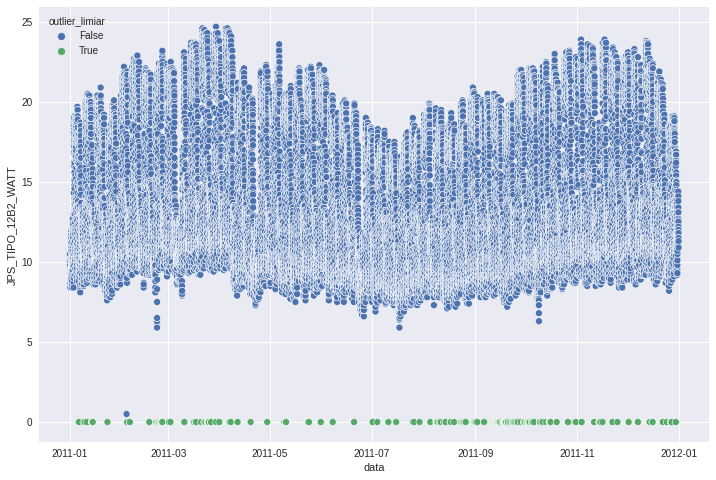

In [121]:
sns.scatterplot(data=jps_year, x=jps_year.index, y=col1, hue="outlier_limiar")
plt.show()

In [114]:
jps_year_nulos['outlier_limiar'].value_counts()

False    35039
True         1
Name: outlier_limiar, dtype: int64

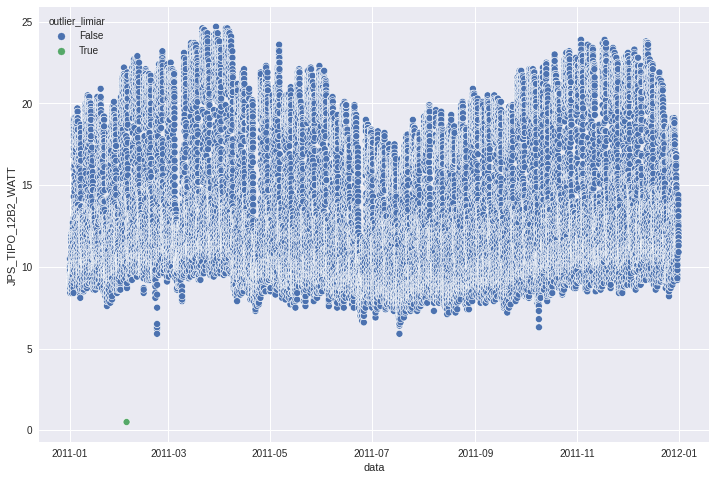

In [123]:
sns.scatterplot(data=jps_year_nulos, x=jps_year.index, y=col1, hue="outlier_limiar")
plt.show()

In [115]:
def outliers_iqr(dados):
    q1 = dados.quantile(.25)
    q3 = dados.quantile(.75)
    iqr = q3-q1
    limiar_max = iqr + 1.5*iqr
    limiar_min = iqr - 1.5*iqr
    
    outliers = dados.apply(lambda x: (x>limiar_max or x < limiar_min))
    return outliers

In [116]:
jps_year['outlier_iqr'] = outliers_limiar(jps_year[col1])
jps_year_nulos['outlier_iqr'] = outliers_limiar(jps_year_nulos[col1])

<ipython-input-116-bdc3717dd8f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jps_year['outlier_iqr'] = outliers_limiar(jps_year[col1])
<ipython-input-116-bdc3717dd8f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jps_year_nulos['outlier_iqr'] = outliers_limiar(jps_year_nulos[col1])


In [117]:
jps_year['outlier_iqr'].value_counts()

False    34624
True       416
Name: outlier_iqr, dtype: int64

In [118]:
jps_year_nulos['outlier_iqr'].value_counts()

False    35039
True         1
Name: outlier_iqr, dtype: int64

In [ ]:
sn